In [ ]:
pip install tensorflow

In [ ]:
pip install keras

In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt



In [2]:
import tensorflow as tf
tf.keras.preprocessing.image_dataset_from_directory

<function keras.src.utils.image_dataset.image_dataset_from_directory(directory, labels='inferred', label_mode='int', class_names=None, color_mode='rgb', batch_size=32, image_size=(256, 256), shuffle=True, seed=None, validation_split=None, subset=None, interpolation='bilinear', follow_links=False, crop_to_aspect_ratio=False, **kwargs)>

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [77]:
!pip show tensorflow

Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine-rl, tf_keras


**Image Preprocessing**

In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Plant disease/Validation/Validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 60 files belonging to 3 classes.
['Healthy', 'Powdery', 'Rust']


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
train_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Plant disease/Train',
    labels="inferred",
    label_mode="categorical",
    # healthy is a subdirectory name which becomes the label mode
    #since more than two labels are present we cannot use label_mode=binary
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    #at each iteration take 32 images
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = train_set.class_names
print(class_name)

Found 1322 files belonging to 3 classes.
['Healthy', 'Powdery', 'Rust']


In [7]:
for x,y in validation_set:
  print(x,x.shape)
  print(y,y.shape)
  break

tf.Tensor(
[[[[198.75     228.625    166.375   ]
   [183.1875   214.1875   144.9375  ]
   [164.60156  195.60156  138.60156 ]
   ...
   [112.0625   167.125    134.9375  ]
   [ 91.75     147.75     102.75    ]
   [ 95.84375  152.71875  111.96875 ]]

  [[217.60156  241.22656  183.30469 ]
   [210.625    236.       168.82812 ]
   [172.11719  197.11719  142.11719 ]
   ...
   [120.25     178.25     153.25    ]
   [115.515625 168.51562  125.265625]
   [119.14844  175.02344  136.02344 ]]

  [[216.03906  236.03906  183.03906 ]
   [211.625    230.625    175.625   ]
   [181.63281  199.63281  147.63281 ]
   ...
   [132.88281  190.88281  166.50781 ]
   [132.0625   185.0625   141.8125  ]
   [123.96094  178.96094  139.58594 ]]

  ...

  [[ 77.265625 105.015625  44.015625]
   [101.39844  141.57812   72.16406 ]
   [ 79.       133.        47.      ]
   ...
   [ 97.80469  124.80469   89.80469 ]
   [107.63281  134.82812   89.24219 ]
   [102.27344  147.67188   82.796875]]

  [[ 98.11719  139.15625   73.5312

In [8]:
for x,y in train_set:
  print(x,x.shape)
  print(y,y.shape)
  break

tf.Tensor(
[[[[ 87.234375 132.23438   64.984375]
   [ 86.39844  133.39844   55.398438]
   [ 85.625    132.625     52.625   ]
   ...
   [149.5625   189.5625   101.5625  ]
   [151.875    190.875    109.875   ]
   [156.10938  194.23438  116.734375]]

  [[ 84.91406  130.91406   58.789062]
   [ 87.57031  134.57031   56.570312]
   [ 84.50781  131.50781   51.507812]
   ...
   [148.46094  187.46094  104.46094 ]
   [151.11719  190.11719  107.11719 ]
   [155.03125  194.03125  113.359375]]

  [[ 77.171875 126.171875  46.921875]
   [ 85.05469  132.05469   51.054688]
   [ 84.84375  131.84375   50.84375 ]
   ...
   [150.6875   189.6875   106.6875  ]
   [151.49219  193.49219  109.49219 ]
   [158.67188  198.67188  112.671875]]

  ...

  [[ 91.86719  129.90625   89.99219 ]
   [102.11719  141.49219   83.24219 ]
   [ 83.125    127.125     51.375   ]
   ...
   [120.375    155.375     97.375   ]
   [124.       162.       101.      ]
   [126.75781  166.50781  104.88281 ]]

  [[ 88.765625 128.71875   78.4921

**Building Model**

In [24]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential

In [25]:
model = Sequential()

In [26]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [27]:
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [28]:
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [29]:
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [30]:
model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [31]:
model.add((Dropout(0.25)))
#25 percent neurons are dropped to avoid overfitting of the model

In [32]:
model.add(Flatten())

In [33]:
model.add(Dense(units=1500,activation='relu'))
#Input layer

In [34]:
model.add((Dropout(0.4)))

In [35]:
model.add(Dense(units=3,activation='softmax'))
#Output layer

**Compiling and Training Phase**

In [36]:
model.compile(optimizer='adam', loss ='categorical_crossentropy',metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                 

In [38]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
#the learning rate was changes here to improve the accuracy over herea

In [39]:
training_history = model.fit(x=train_set,validation_data=validation_set,epochs=10)

Epoch 1/10
42/42 [==============================] - 147s 3s/step - loss: 0.9952 - accuracy: 0.5113 - val_loss: 0.7719 - val_accuracy: 0.6000
Epoch 2/10
42/42 [==============================] - 144s 3s/step - loss: 0.6216 - accuracy: 0.7201 - val_loss: 0.5390 - val_accuracy: 0.8167
Epoch 3/10
42/42 [==============================] - 149s 3s/step - loss: 0.4209 - accuracy: 0.8343 - val_loss: 0.4450 - val_accuracy: 0.8000
Epoch 4/10
42/42 [==============================] - 142s 3s/step - loss: 0.2948 - accuracy: 0.8941 - val_loss: 0.3340 - val_accuracy: 0.9167
Epoch 5/10
42/42 [==============================] - 140s 3s/step - loss: 0.2040 - accuracy: 0.9259 - val_loss: 0.4245 - val_accuracy: 0.8667
Epoch 6/10
42/42 [==============================] - 144s 3s/step - loss: 0.1675 - accuracy: 0.9387 - val_loss: 0.3592 - val_accuracy: 0.8833
Epoch 7/10
42/42 [==============================] - 141s 3s/step - loss: 0.1090 - accuracy: 0.9576 - val_loss: 0.6249 - val_accuracy: 0.8500
Epoch 8/10
42

**Model Evaluation**

In [40]:
train_loss, train_acc = model.evaluate(train_set)
print('Training accuracy:', train_acc)
#Training set Accuracy

42/42 [==============================] - 63s 1s/step - loss: 0.0324 - accuracy: 0.9909
Training accuracy: 0.9909228682518005


In [41]:
#Validation set Accuracy
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

2/2 [==============================] - 4s 578ms/step - loss: 0.2841 - accuracy: 0.9500
Validation accuracy: 0.949999988079071


**Saving Model**


In [42]:
model.save('trained_plant_disease_model.keras')

In [43]:
training_history.history #Return Dictionary of historyb

{'loss': [0.9952290058135986,
  0.6216055750846863,
  0.4209156930446625,
  0.2948191463947296,
  0.20395882427692413,
  0.16749611496925354,
  0.10904541611671448,
  0.15009641647338867,
  0.08277495205402374,
  0.07917097955942154],
 'accuracy': [0.5113464593887329,
  0.7201210260391235,
  0.8343418836593628,
  0.8940998315811157,
  0.925869882106781,
  0.9387292265892029,
  0.9576399326324463,
  0.9493191838264465,
  0.9697428345680237,
  0.974281370639801],
 'val_loss': [0.7719000577926636,
  0.5389567017555237,
  0.44501838088035583,
  0.33396637439727783,
  0.4245152771472931,
  0.35924166440963745,
  0.6248716711997986,
  0.2891259789466858,
  0.22463954985141754,
  0.2841072678565979],
 'val_accuracy': [0.6000000238418579,
  0.8166666626930237,
  0.800000011920929,
  0.9166666865348816,
  0.8666666746139526,
  0.8833333253860474,
  0.8500000238418579,
  0.8999999761581421,
  0.949999988079071,
  0.949999988079071]}

In [44]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [45]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


 **Accuracy Vizualization**

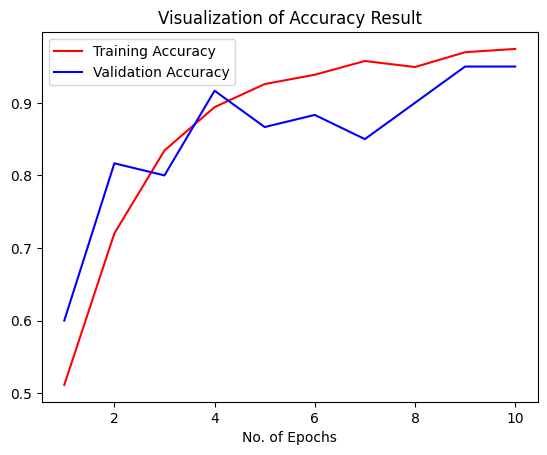

In [46]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

**Some other metrics used for model evaluation**

In [48]:
class_name = test_set.class_names

In [47]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Plant disease/Test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 160 files belonging to 3 classes.


In [63]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

160/160 [==============================] - 8s 50ms/step


(array([[9.78750110e-01, 1.87652502e-02, 2.48462218e-03],
        [9.97717381e-01, 1.91341795e-03, 3.69123212e-04],
        [9.91010189e-01, 3.81616876e-03, 5.17361239e-03],
        [9.96854007e-01, 2.72524171e-03, 4.20812576e-04],
        [1.00000000e+00, 1.55465814e-11, 1.10175939e-08],
        [9.91344213e-01, 5.78762311e-03, 2.86814594e-03],
        [9.99990702e-01, 3.14257022e-07, 8.91528362e-06],
        [9.19940472e-01, 1.82388350e-02, 6.18207157e-02],
        [1.00000000e+00, 1.14023103e-12, 6.72777778e-10],
        [9.96018469e-01, 2.51415349e-03, 1.46735448e-03],
        [9.99987602e-01, 7.47998058e-07, 1.17096215e-05],
        [9.96181488e-01, 2.20107706e-03, 1.61745551e-03],
        [1.31677821e-01, 8.51858556e-01, 1.64636485e-02],
        [9.23068047e-01, 7.07632974e-02, 6.16867561e-03],
        [1.00000000e+00, 3.28637779e-13, 2.55992716e-09],
        [9.98947799e-01, 3.42633757e-06, 1.04878435e-03],
        [9.89341497e-01, 1.00277830e-02, 6.30689145e-04],
        [7.463

In [66]:
predicted_categories = tf.argmax(y_pred,axis=1)
#to extract the class with maximum probability

In [67]:
predicted_categories

<tf.Tensor: shape=(160,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])>

In [68]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories
#iterating over the test set
#one hot encoding is done here that is for the 1st array the test set belongs to class 1 that is why class 1 is 1 for the rest class it is 0


<tf.Tensor: shape=(160, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
     

In [69]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(160,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])>

In [70]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [71]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

              precision    recall  f1-score   support

     Healthy       0.91      0.96      0.93        50
     Powdery       0.97      0.95      0.96        60
        Rust       1.00      0.96      0.98        50

    accuracy                           0.96       160
   macro avg       0.96      0.96      0.96       160
weighted avg       0.96      0.96      0.96       160



**Confusion Matrix Vizualization**

In [73]:
cm  = confusion_matrix(Y_true,predicted_categories)
cm

array([[48,  2,  0],
       [ 3, 57,  0],
       [ 2,  0, 48]])

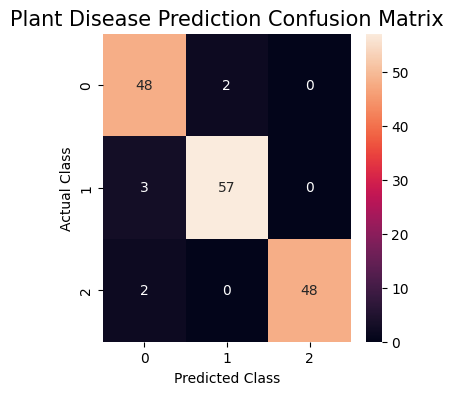

In [77]:
import seaborn as sns
plt.figure(figsize=(4, 4))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 10)
plt.ylabel('Actual Class',fontsize = 10)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 15)
plt.show()


In [62]:
model.predict(test_set)

160/160 [==============================] - 8s 52ms/step


array([[9.78750110e-01, 1.87652502e-02, 2.48462218e-03],
       [9.97717381e-01, 1.91341795e-03, 3.69123212e-04],
       [9.91010189e-01, 3.81616876e-03, 5.17361239e-03],
       [9.96854007e-01, 2.72524171e-03, 4.20812576e-04],
       [1.00000000e+00, 1.55465814e-11, 1.10175939e-08],
       [9.91344213e-01, 5.78762311e-03, 2.86814594e-03],
       [9.99990702e-01, 3.14257022e-07, 8.91528362e-06],
       [9.19940472e-01, 1.82388350e-02, 6.18207157e-02],
       [1.00000000e+00, 1.14023103e-12, 6.72777778e-10],
       [9.96018469e-01, 2.51415349e-03, 1.46735448e-03],
       [9.99987602e-01, 7.47998058e-07, 1.17096215e-05],
       [9.96181488e-01, 2.20107706e-03, 1.61745551e-03],
       [1.31677821e-01, 8.51858556e-01, 1.64636485e-02],
       [9.23068047e-01, 7.07632974e-02, 6.16867561e-03],
       [1.00000000e+00, 3.28637779e-13, 2.55992716e-09],
       [9.98947799e-01, 3.42633757e-06, 1.04878435e-03],
       [9.89341497e-01, 1.00277830e-02, 6.30689145e-04],
       [7.46310651e-01, 2.46529